<a href="https://colab.research.google.com/github/marcelofxavier/MVP-Sprint-Data-Analysis/blob/main/MarceloXavier_MVP_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Marcelo Xavier - Data Analysis**

# **1. Problem Definition**
The problem focuses on evaluating the financial risk associated with loan approvals by analyzing the data to understand how various attributes relate to the probability of an individual being approved or denied a loan. This involves examining a continuous risk score that indicates the potential for loan default or financial instability, as well as exploring a binary outcome for loan approval. The dataset includes diverse features such as demographic details, credit history, employment status, and financial metrics, which will be analyzed to gain insights into the factors influencing loan approval decisions.

### **Questions to answer**
1. Do individuals with a positive credit history (high "CreditScore") are more likely to be approved?
2. Will the ratio between debt and income ("DebtToIncomeRatio") and the Risk Score be a critical factor in loan approval?
3. Does factors such as "AnnualIncome," "EmploymentStatus," and "LoanPurpose" significantly impact loan approval?
4. Does the loan amount affect the approval chances?




# **2. Data Catalog**

The dataset includes 20,000 records with 35 columns:

| **Attribute**            | **Description**                     |
|--------------------------|-------------------------------------|
| ApplicationDate          | Loan application date               |
| Age                      | Applicant's age                     |
| AnnualIncome             | Yearly income                       |
| CreditScore              | Creditworthiness score              |
| EmploymentStatus         | Job situation                       |
| EducationLevel           | Highest education attained          |
| Experience               | Work experience                     |
| LoanAmount               | Requested loan size                 |
| LoanDuration             | Loan repayment period               |
| MaritalStatus            | Applicant's marital state           |
| NumberOfDependents       | Number of dependents                |
| HomeOwnershipStatus      | Homeownership type                  |
| MonthlyDebtPayments      | Monthly debt obligations            |
| CreditCardUtilizationRate| Credit card usage percentage        |
| NumberOfOpenCreditLines  | Active credit lines                 |
| NumberOfCreditInquiries  | Credit checks count                 |
| DebtToIncomeRatio        | Debt to income proportion           |
| BankruptcyHistory        | Bankruptcy records                  |
| LoanPurpose              | Reason for loan                     |
| PreviousLoanDefaults     | Prior loan defaults                 |
| PaymentHistory           | Past payment behavior               |
| LengthOfCreditHistory    | Credit history duration             |
| SavingsAccountBalance    | Savings account amount              |
| CheckingAccountBalance   | Checking account funds              |
| TotalAssets              | Total owned assets                  |
| TotalLiabilities         | Total owed debts                    |
| MonthlyIncome            | Income per month                    |
| UtilityBillsPaymentHistory| Utility payment record             |
| JobTenure                | Job duration                        |
| NetWorth                 | Total financial worth               |
| BaseInterestRate         | Starting interest rate              |
| InterestRate             | Applied interest rate               |
| MonthlyLoanPayment       | Monthly loan payment                |
| TotalDebtToIncomeRatio   | Total debt against income           |
| LoanApproved             | Loan approval status                |
| RiskScore                | Risk assessment score               |


#**3. Data Analysis**

In [17]:
# Configuration to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [18]:
# Provides the URL for dataset import
url = "https://raw.githubusercontent.com/marcelofxavier/MVP-Sprint-Data-Analysis/main/Loan.csv"

# Reads the file
dataset = pd.read_csv(url, delimiter=',')

# Displays the first few rows of the dataset to understand its structure
dataset.head()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [19]:
# Displays a summary of the dataset, showing the columns and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [20]:
# Checking for missing values in the dataset
dataset.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


We can observe that there are no missing values in our dataset.

In [21]:
# Checking for duplicate values in the dataset
dataset.duplicated().sum()


0

We can observe that there are no duplicate values in our dataset.

In [22]:
# Checking how many unique values we have in the dataset
dataset.nunique()


,0
ApplicationDate,20000
Age,63
AnnualIncome,17516
CreditScore,322
EmploymentStatus,3
EducationLevel,5
Experience,62
LoanAmount,15578
LoanDuration,10
MaritalStatus,4


In [23]:
# Getting a better understanding of the data in the dataset
dataset.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.75,11.62,18.00,32.00,40.00,48.00,80.00
AnnualIncome,20000.0,59161.47,40350.85,15000.00,31679.00,48566.00,74391.00,485341.00
CreditScore,20000.0,571.61,51.00,343.00,540.00,578.00,609.00,712.00
Experience,20000.0,17.52,11.32,0.00,9.00,17.00,25.00,61.00
LoanAmount,20000.0,24882.87,13427.42,3674.00,15575.00,21914.50,30835.00,184732.00
LoanDuration,20000.0,54.06,24.66,12.00,36.00,48.00,72.00,120.00
NumberOfDependents,20000.0,1.52,1.39,0.00,0.00,1.00,2.00,5.00
MonthlyDebtPayments,20000.0,454.29,240.51,50.00,286.00,402.00,564.00,2919.00
CreditCardUtilizationRate,20000.0,0.29,0.16,0.00,0.16,0.27,0.39,0.92
NumberOfOpenCreditLines,20000.0,3.02,1.74,0.00,2.00,3.00,4.00,13.00


Creating a histogram to understand how the values are distributed

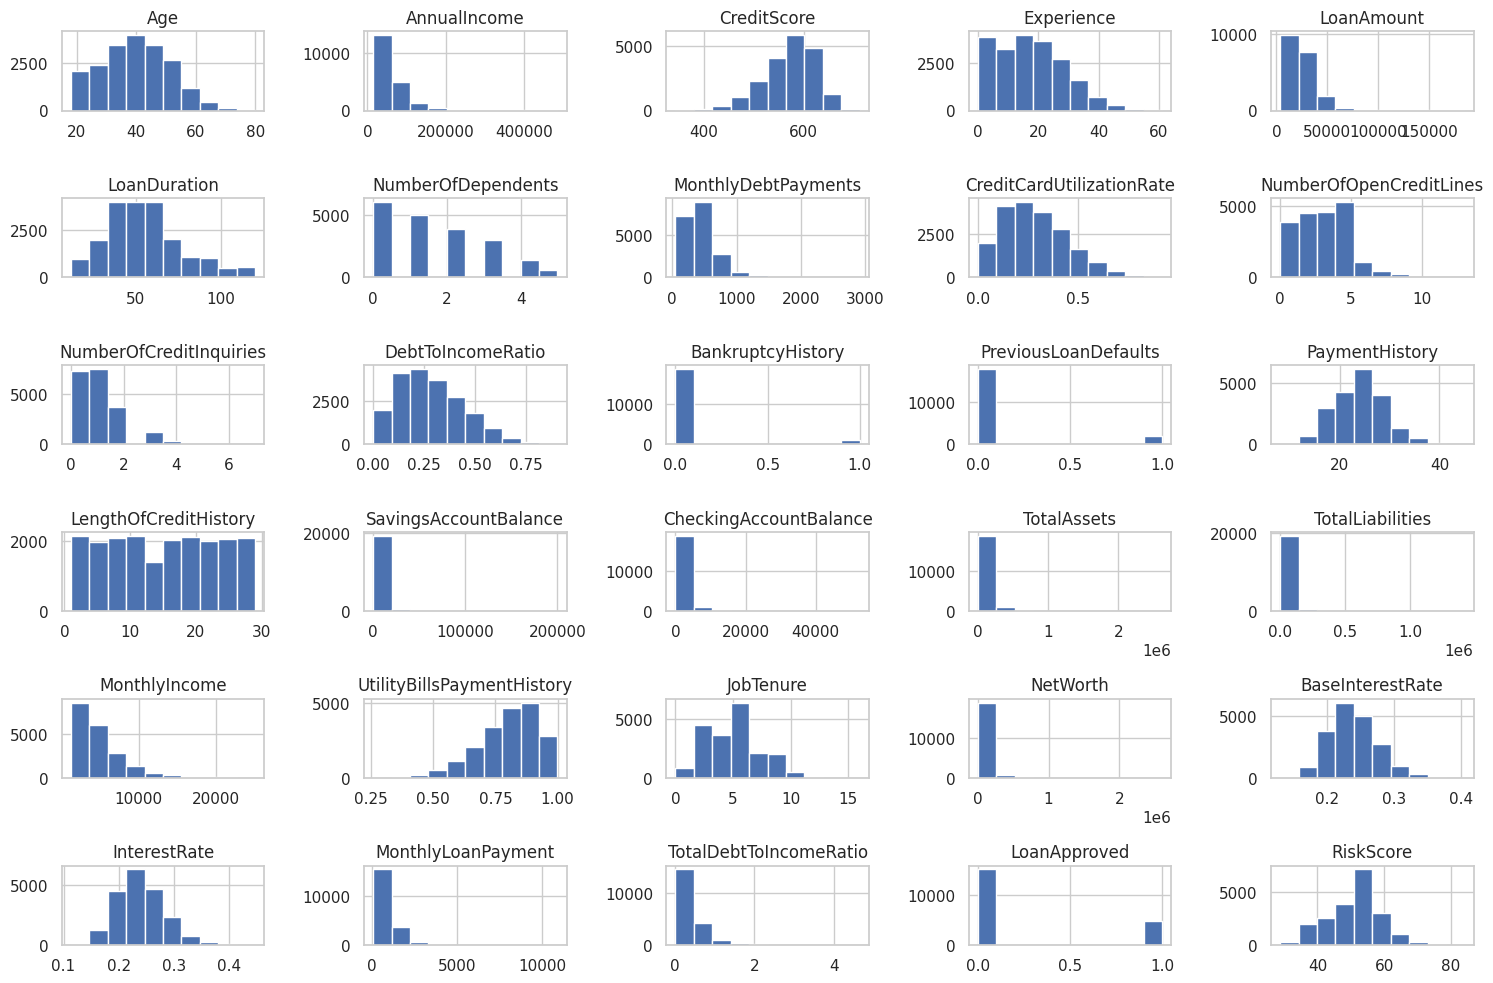

In [24]:
# Histogram
dataset.hist(figsize=(15, 10))
plt.tight_layout()

# Show the plot
plt.show()

### Creating a correlation matrix between the columns of the dataset

A correlation matrix is being created to assess the relationships between the variables in the dataset. By calculating the correlation coefficients, we can identify which variables are positively or negatively correlated, as well as the strength of these relationships. This information is crucial for understanding how different factors may influence loan approval, enabling more informed decisions during analysis.

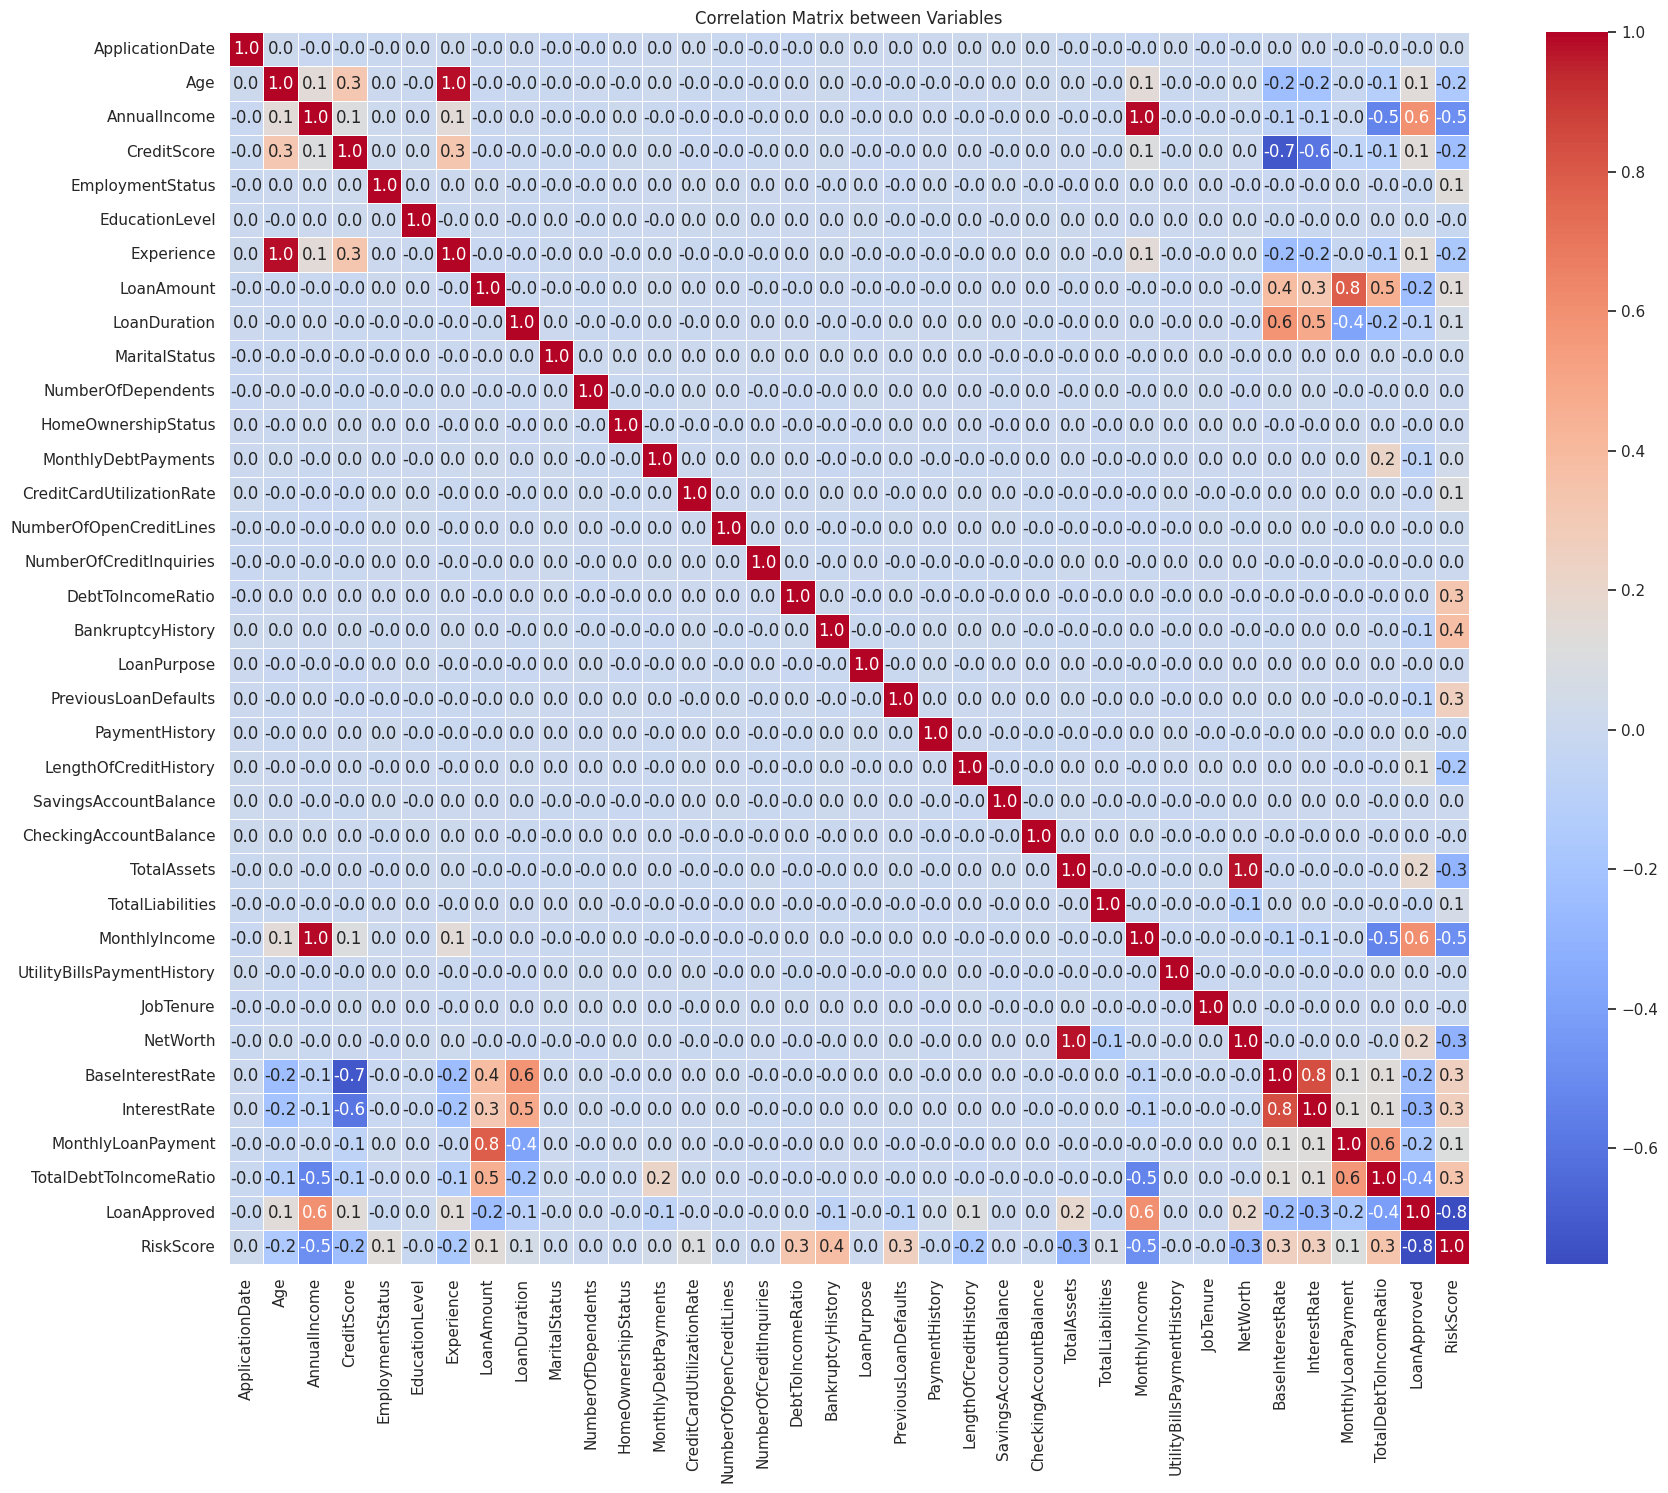

In [25]:
# Create a copy of the original dataframe
dataset_encoded = dataset.copy()

# Identify categorical columns and apply LabelEncoder
categorical_columns = dataset_encoded.select_dtypes(include=['object']).columns

# Apply LabelEncoder to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    dataset_encoded[col] = label_encoder.fit_transform(dataset_encoded[col].astype(str))

# Now generate the correlation matrix with the encoded columns
correlation_matrix = dataset_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()

We observe a positive correlation between loan approval and both AnnualIncome and MonthlyIncome.

Additionally, there is a strong negative correlation between loan approval and RiskScore.

### Question 1: Do individuals with a positive credit history (high "CreditScore") are more likely to be approved?

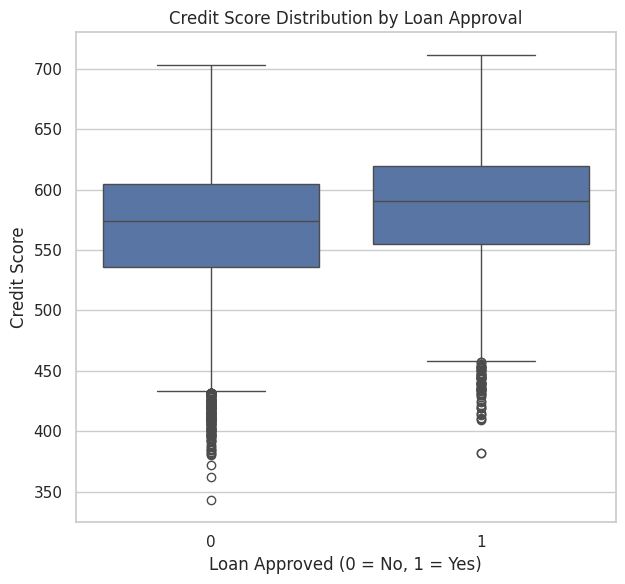

In [26]:
# Set up the plotting style
sns.set(style='whitegrid')

# Setting the size of the plot
plt.figure(figsize=(12, 6))

# Plot CreditScore vs LoanApproved
plt.subplot(1, 2, 1)
sns.boxplot(x='LoanApproved', y='CreditScore', data=dataset)
plt.title('Credit Score Distribution by Loan Approval')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Credit Score')

plt.tight_layout()
plt.show()

We can conclude that a higher Credit Score represents a greater probability of loan approval.

### Question 2: Will the ratio between debt and income ("DebtToIncomeRatio") and the Risk Score be a critical factor in loan approval?

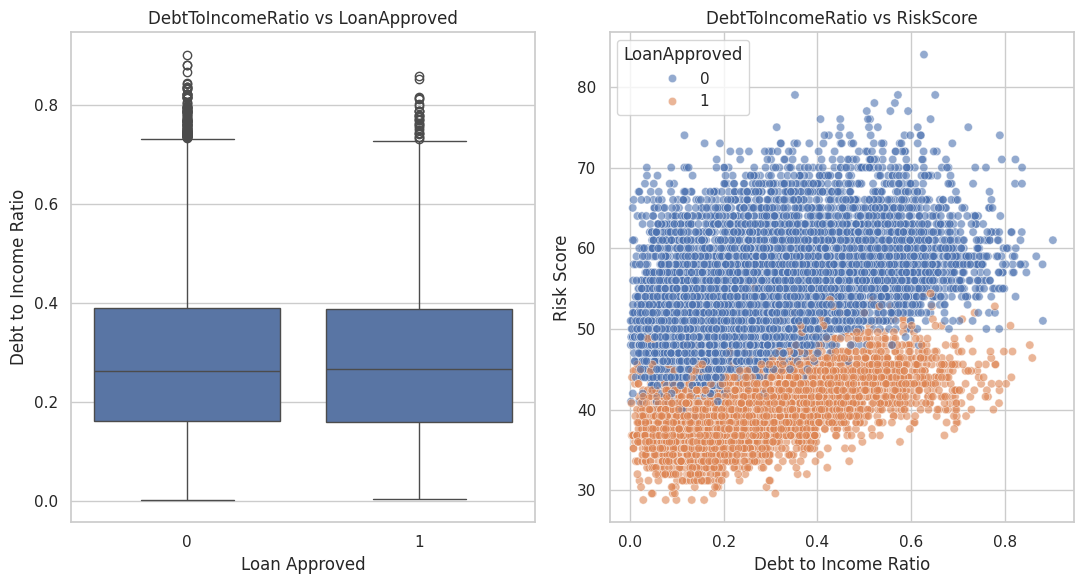

In [27]:
# Setting the size of the plot
plt.figure(figsize=(11, 6))

# DebtToIncomeRatio vs LoanApproved
plt.subplot(1, 2, 1)
sns.boxplot(x='LoanApproved', y='DebtToIncomeRatio', data=dataset)
plt.title('DebtToIncomeRatio vs LoanApproved')
plt.xlabel('Loan Approved')
plt.ylabel('Debt to Income Ratio')

# DebtToIncomeRatio vs RiskScore
plt.subplot(1, 2, 2)
sns.scatterplot(x='DebtToIncomeRatio', y='RiskScore', hue='LoanApproved', data=dataset, alpha=0.6)
plt.title('DebtToIncomeRatio vs RiskScore')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Risk Score')

plt.tight_layout()
plt.show()


We can conclude that the Debt-to-Income Ratio does not exhibit a strong correlation with loan approval, as observed in the correlation matrix (corr = 0.0).

In contrast, the Risk Score shows a significant correlation with loan approval, where a lower Risk Score is associated with a higher probability of loan approval (corr = -0.8).

### Question 3: Does factors such as "AnnualIncome," "EmploymentStatus," and "LoanPurpose" significantly impact loan approval?

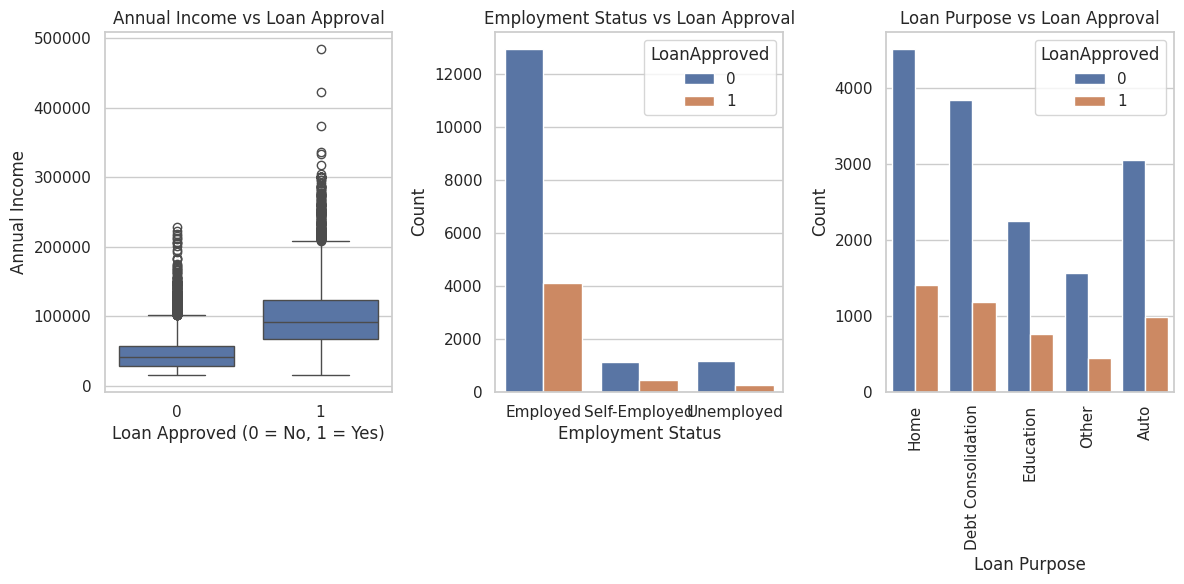

In [28]:
# Set the plot style
sns.set(style="whitegrid")

# Setting the size of the plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='LoanApproved', y='AnnualIncome', data=dataset)
plt.title('Annual Income vs Loan Approval')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Annual Income')

# Plot 2: Employment Status vs Loan Approval
plt.subplot(1, 3, 2)
sns.countplot(x='EmploymentStatus', hue='LoanApproved', data=dataset)
plt.title('Employment Status vs Loan Approval')
plt.xlabel('Employment Status')
plt.ylabel('Count')

# Plot 3: Loan Purpose vs Loan Approval
plt.subplot(1, 3, 3)
sns.countplot(x='LoanPurpose', hue='LoanApproved', data=dataset)
plt.title('Loan Purpose vs Loan Approval')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


We can observe that the higher a person's Annual Income, the greater the likelihood of getting their loan approved.

Furthermore, we can conclude that there is no significant correlation between Employment Status and Loan Approval. Although, in absolute terms, most approved loans belong to employed individuals, this status also has the largest amount of data. When looking at the percentage, we cannot say that being employed increases the chances of loan approval. The same applies to the loan purpose.


### Question 4: Does the loan amount affect the approval chances?

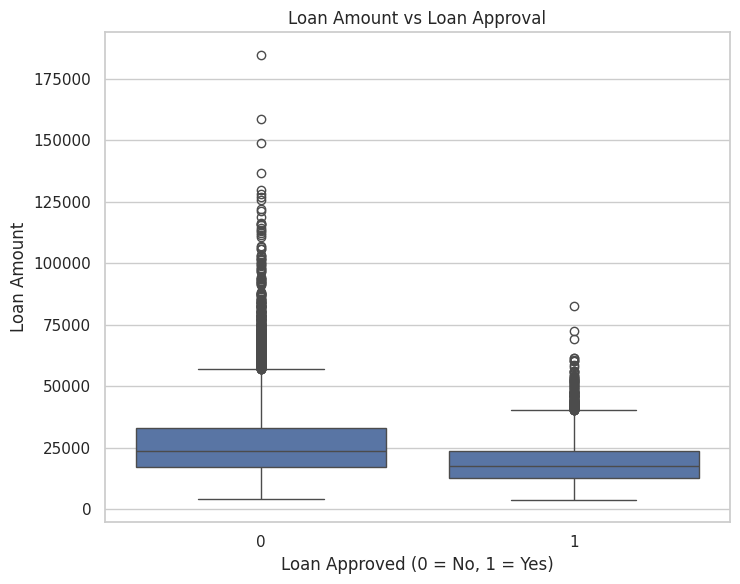

In [29]:
# Plot the impact of loan amount on loan approval chances.
plt.figure(figsize=(14, 6))

# Plot: Loan Amount vs Loan Approval
plt.subplot(1, 2, 1)
sns.boxplot(x='LoanApproved', y='LoanAmount', data=dataset)
plt.title('Loan Amount vs Loan Approval')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Loan Amount')

plt.tight_layout()
plt.show()


We can conclude that the lower the loan amount, the higher the probability of loan approval.

# **4. Conclusion**

In summary, our project analyzing financial risk in loan approvals highlights several key factors that significantly influence lenders' decisions. Among these, annual income emerges as a critical determinant; higher incomes are strongly associated with increased chances of loan approval. This correlation suggests that lenders perceive individuals with robust financial backgrounds as less risky, making them more favorable candidates for loans.

Furthermore, the risk score is another vital element in this equation. A lower risk score indicates a higher likelihood of loan approval, as it signals to lenders that the individual has a better track record of managing debt. Additionally, a strong credit score also plays a crucial role; individuals with higher credit scores are more likely to secure loans, further demonstrating the importance of financial health.

Our analysis indicates that the size of the loan itself matters. Smaller loan amounts tend to have higher approval rates, which may reflect lenders' willingness to take on less risk with smaller sums. On the other hand, factors such as employment status and the reason for seeking a loan show minimal impact on the overall approval process. This suggests that income and credit risk are the primary drivers in the decision-making framework for loan approvals. Overall, these findings provide valuable insights into the dynamics of lending and the critical attributes that can enhance an individual's chances of obtaining a loan.